# Deep Learning (AI5100)
## Assignment 2: <i>Convolutional Neural Networks</i>

<b>Name</b> - Sayanta Adhikari </br>
<b>Roll No</b> - AI22MTECH12005

#### Problems

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.decomposition import PCA

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
np.random.seed(33)

The shape of the image is : (224, 224, 3)
The image is : 


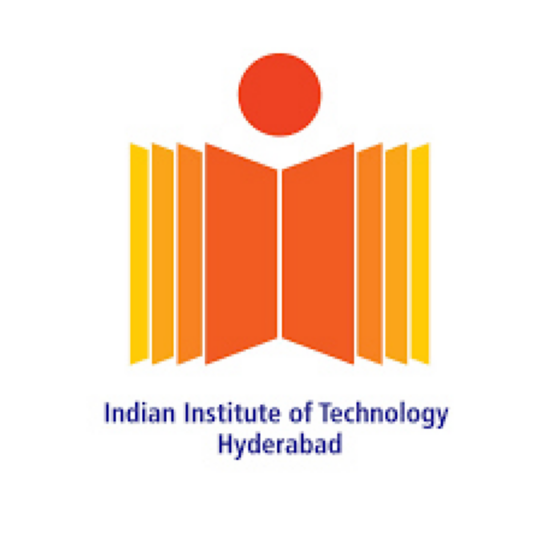

In [124]:
# Reading the IITH Logo Image

image = plt.imread('iith.jpg')
image = image[:-1, :-1, :3]
print(f"The shape of the image is : {image.shape}")
print("The image is : ")
plt.xticks([]); plt.yticks([])
plt.imshow(image)
plt.show()

1. Convolution Function

In [125]:
# Activation functions

def sigmoid(X: np.ndarray) -> np.ndarray:
    import warnings
    warnings.filterwarnings('ignore')
    temp = np.nan_to_num(np.exp(-1.0 * X))
    return 1.0 / (1.0 + temp)

def tanh(X: np.ndarray) -> np.ndarray:
    import warnings
    warnings.filterwarnings('ignore')
    temp = np.nan_to_num(np.exp(2.0 * X))
    return (temp - 1) / (temp + 1)

def relu(X: np.ndarray) -> np.ndarray:
    return X * (X > 0)

def prelu(X: np.ndarray, a: float = 0.02) -> np.ndarray:
    return X * (X > 0) + a * X * (X <= 0)

# Padding function

def padding(img: np.ndarray, pad: int, pad_type: str, show: bool = False) -> np.ndarray:
    n, m, c = img.shape
    if pad_type == 'zero':
        img_new = np.zeros([n + 2*pad, m + 2*pad, c], dtype='uint8')
        img_new[pad: -pad, pad: -pad, :] = img
        if show:
            print("The Padded Image is : ")
            plt.xticks([]); plt.yticks([])
            plt.imshow(img_new)
            plt.show()
        return img_new
    if pad_type == 'mirror':
        img_new = np.zeros([n + 2*pad, m + 2*pad, c], dtype='uint8')
        img_new[pad: -pad, pad: -pad, :] = img
        img_new[pad: -pad, 0: pad, :] = np.flip(img[:, 0: pad, :], axis=1)
        img_new[pad: -pad, -pad: , :] = np.flip(img[:, -pad: , :], axis=1)
        img_new[0: pad, pad: -pad, :] = np.flip(img[0: pad, :, :], axis=0)
        img_new[-pad: , pad: -pad, :] = np.flip(img[-pad: , :, :], axis=0)
        if show:
            print("The Padded Image is : ")
            plt.xticks([]); plt.yticks([])
            plt.imshow(img_new)
            plt.show()
        return img_new

In [126]:
# Convolution function

def convolution(img: np.ndarray, filter: np.ndarray, stride: int, pad: int, pad_type: str, activation_fn: str, show: bool = False) -> np.ndarray:
    # Default values
    ACTIVATION_FN = {'relu': relu, 'sigmoid': sigmoid, 'tanh': tanh, 'prelu': prelu}
    PAD_TYPE = {'zero', 'mirror', 'none'}

    # Parameter Checks
    if activation_fn not in ACTIVATION_FN.keys():
        raise ValueError("convolution: activation_fn must be one of %r ." % ACTIVATION_FN)
    if pad_type not in PAD_TYPE:
        raise ValueError("convolution: pad_type must be one of %r ." % PAD_TYPE)

    n, m, c_i = img.shape ; k1, k2, c_f = filter.shape

    if k1 % 2 == 0 or k2 % 2 == 0:
        raise ValueError("convolution: filter shape dimensions must be odd.")
    if c_i != c_f:
        raise ValueError("convolution: img and filter channel dimension must match.")
    if (n + 2* pad - k1)/stride != (n + 2* pad - k1)//stride:
        raise ValueError("convolution: (img.shape[0] + 2*pad - filter.shape[0])/stride must be an integer.")
    if (m + 2* pad - k2)/stride != (m + 2* pad - k2)//stride:
        raise ValueError("convolution: (img.shape[1] + 2*pad - filter.shape[1])/stride must be an integer.")

    # Applying padding
    if pad_type != 'none':
        img = padding(img, pad, pad_type, show)
        n = n + 2*pad; m = m + 2*pad

    s1 = n - k1 + stride; s2 = m - k2 + stride

    # Performing convolution
    activation = np.zeros([s1//stride, s2//stride])
    k = 0
    for i in range(k1//2, s1, stride):
        l = 0
        for j in range(k2//2, s2, stride):
            temp = img[i - k1//2: i + k1//2 + 1, j - k2//2: j + k2//2 + 1, :] * filter
            activation[k, l] = np.sum(temp)
            l +=1
        k += 1
    # print(np.max(activation), np.min(activation))
    # plt.imshow(activation, cmap='gray')
    return ACTIVATION_FN[activation_fn](activation)

The shape of the kernel is: (3, 3, 3)
The filter is: 


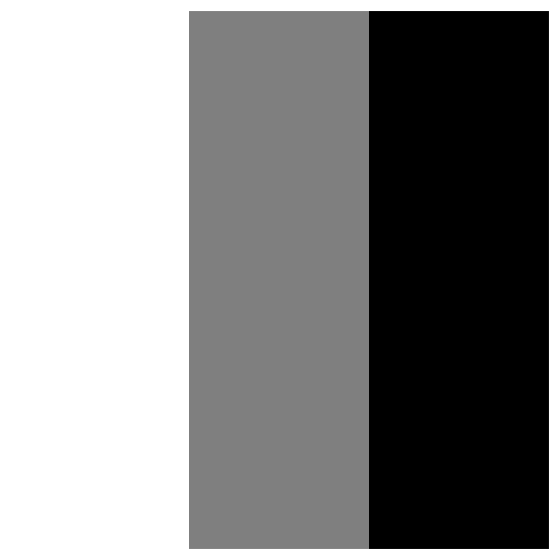

In [127]:
kernel = np.repeat(np.array([[[1], [0], [-1]], [[1], [0], [-1]], [[1], [0], [-1]]]), repeats=3, axis=2)
print(f"The shape of the kernel is: {kernel.shape}")
print("The filter is: ")
plt.xticks([]); plt.yticks([])
plt.imshow((kernel + 1) * 255//2)
plt.show()

The shape of the activation after convolution is: (222, 222)
The activation map is : 


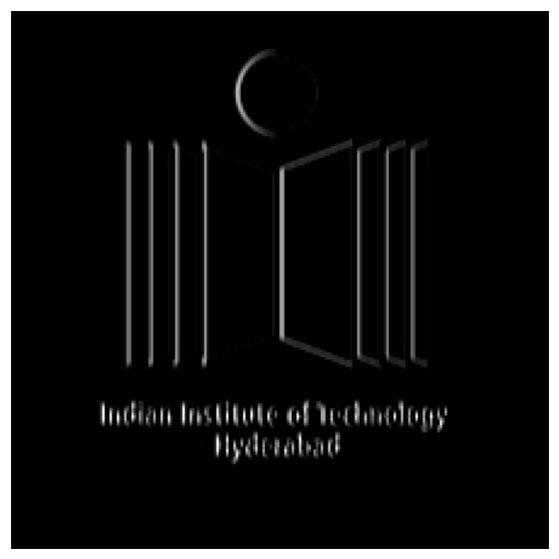

In [128]:
# Preforming Convolution

activation = convolution(img=image, filter=kernel, stride=1, pad=10, pad_type='none', activation_fn='relu', show=True)
plt.figure()
print(f"The shape of the activation after convolution is: {activation.shape}")
print("The activation map is : ")
plt.xticks([]); plt.yticks([])
plt.imshow(activation, cmap='gray')
plt.show()

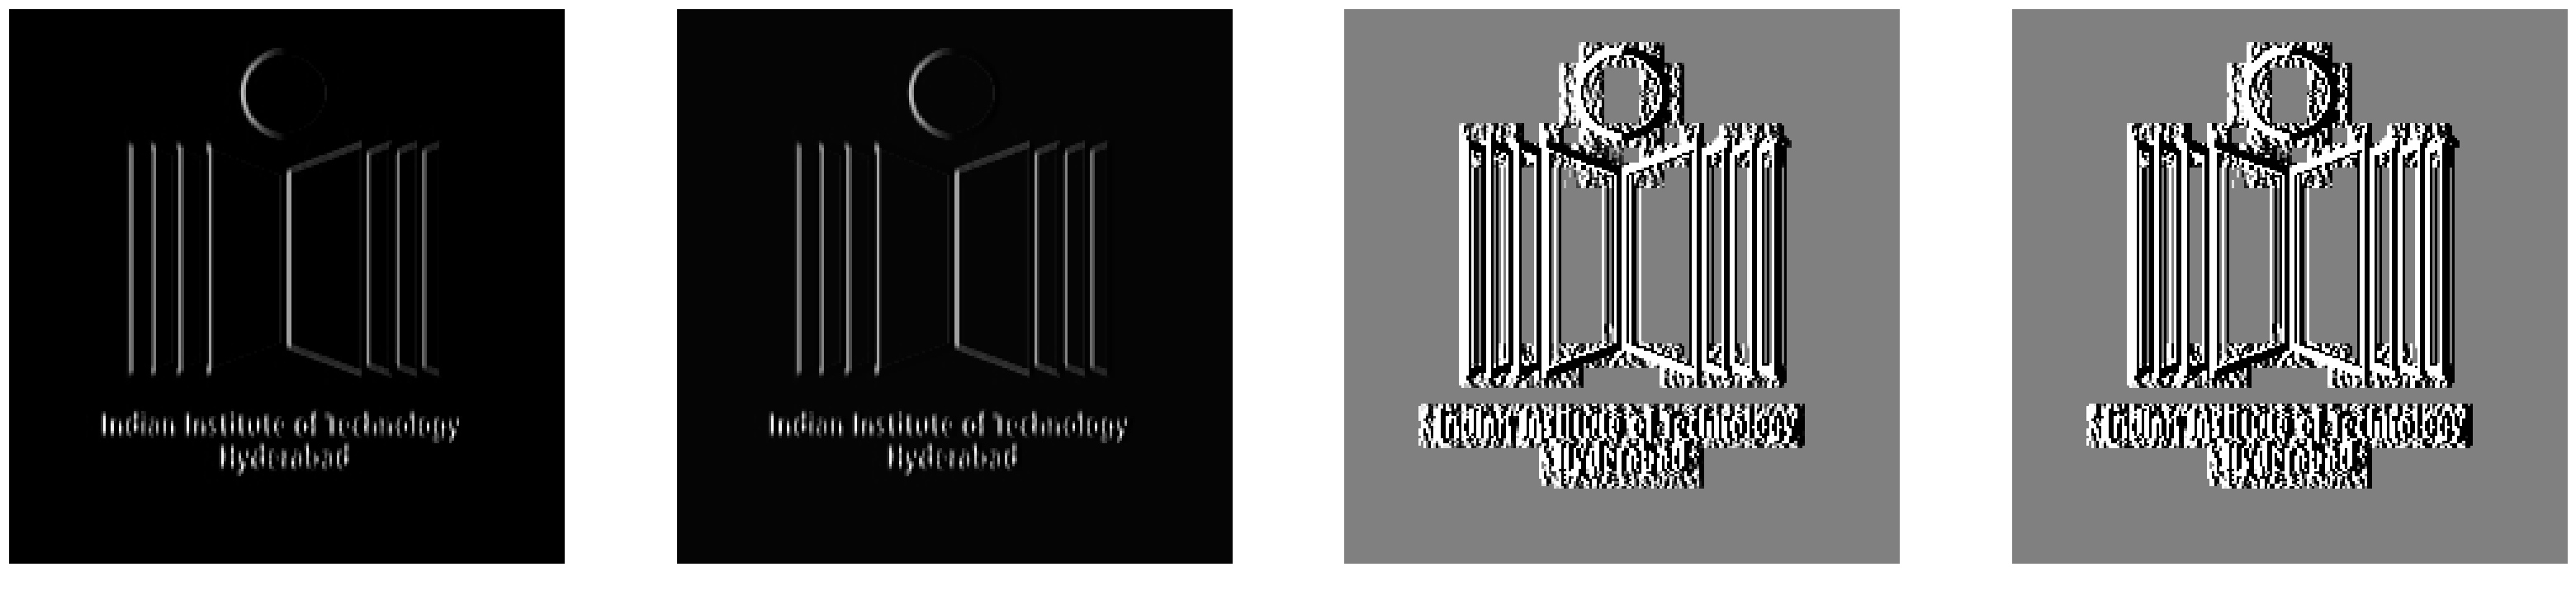

In [129]:
# Showning output for all activation function
act_fn = ['relu', 'prelu', 'sigmoid', 'tanh']
fig, axes = plt.subplots(1, 4, figsize=(40, 10))
for ax, act_f in zip(axes, act_fn):
    act = convolution(img=image, filter=kernel, stride=1, pad=10, pad_type='none', activation_fn=act_f, show=False)
    ax.imshow(act, cmap='gray')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(act_f + ' output')
    ax.xaxis.label.set_color('white')
    ax.xaxis.label.set_fontsize(25) 


2. Pooling Function

In [130]:
# Helper function for pooling function

def _pooling(img: np.ndarray, pool_type: str) -> np.ndarray:
    if pool_type == 'max':
        return np.max(np.max(img, axis=0),axis=0)
    if pool_type == 'min':
        return np.min(np.min(img, axis=0),axis=0)
    if pool_type == 'avg':
        return np.average(np.average(img, axis=0),axis=0)

In [131]:
# Pooling Function

def pooling(img: np.ndarray, pool_type: str, stride: int = None, pool: "list[int]" = None) -> np.ndarray:
    # Default Values
    POOL_TYPE = {'max', 'min', 'avg' , 'GAP'}

    # Parameter checks
    if pool_type not in POOL_TYPE:
        raise ValueError("pooling: pool_type must be one of %r ." % POOL_TYPE)

    n, m = img.shape

    # If pool filter size is not provided then it considers the stride as pool filter dimension
    if pool == None:
        pool1 = pool2 = stride
    elif len(pool) == 1:
        pool1 = pool2 = pool[0]
    elif len(pool) == 2:
        pool1 = pool[0]; pool2 = pool[1]
    else:
        raise ValueError("pooling: length of pool must be less than or equal to 2")

    if stride != None and (n - pool1)/stride != (n - pool1)//stride:
        raise ValueError("pooling: (image.shape[0] - pool[0])/stride must be an integer")

    if stride != None and (m - pool2)/stride != (m - pool2)//stride:
        raise ValueError("pooling: (image.shape[1] - pool[1])/stride must be an integer")
    
    # Performing pooling
    if pool_type != 'GAP':
        s1 = (n - pool1 + stride)//stride; s2 = (m - pool2 + stride)//stride
        output = np.zeros([s1, s2])
        k = 0
        for i in range(0, n - pool1 + 1, stride):
            l = 0
            for j in range(0, m - pool2 + 1, stride):
                output[k, l] = _pooling(img[i: i+pool1+1, j: j+pool2+1], pool_type)
                l += 1
            k +=1
        return output
    else:
        return _pooling(img, 'avg').reshape(1, 1)

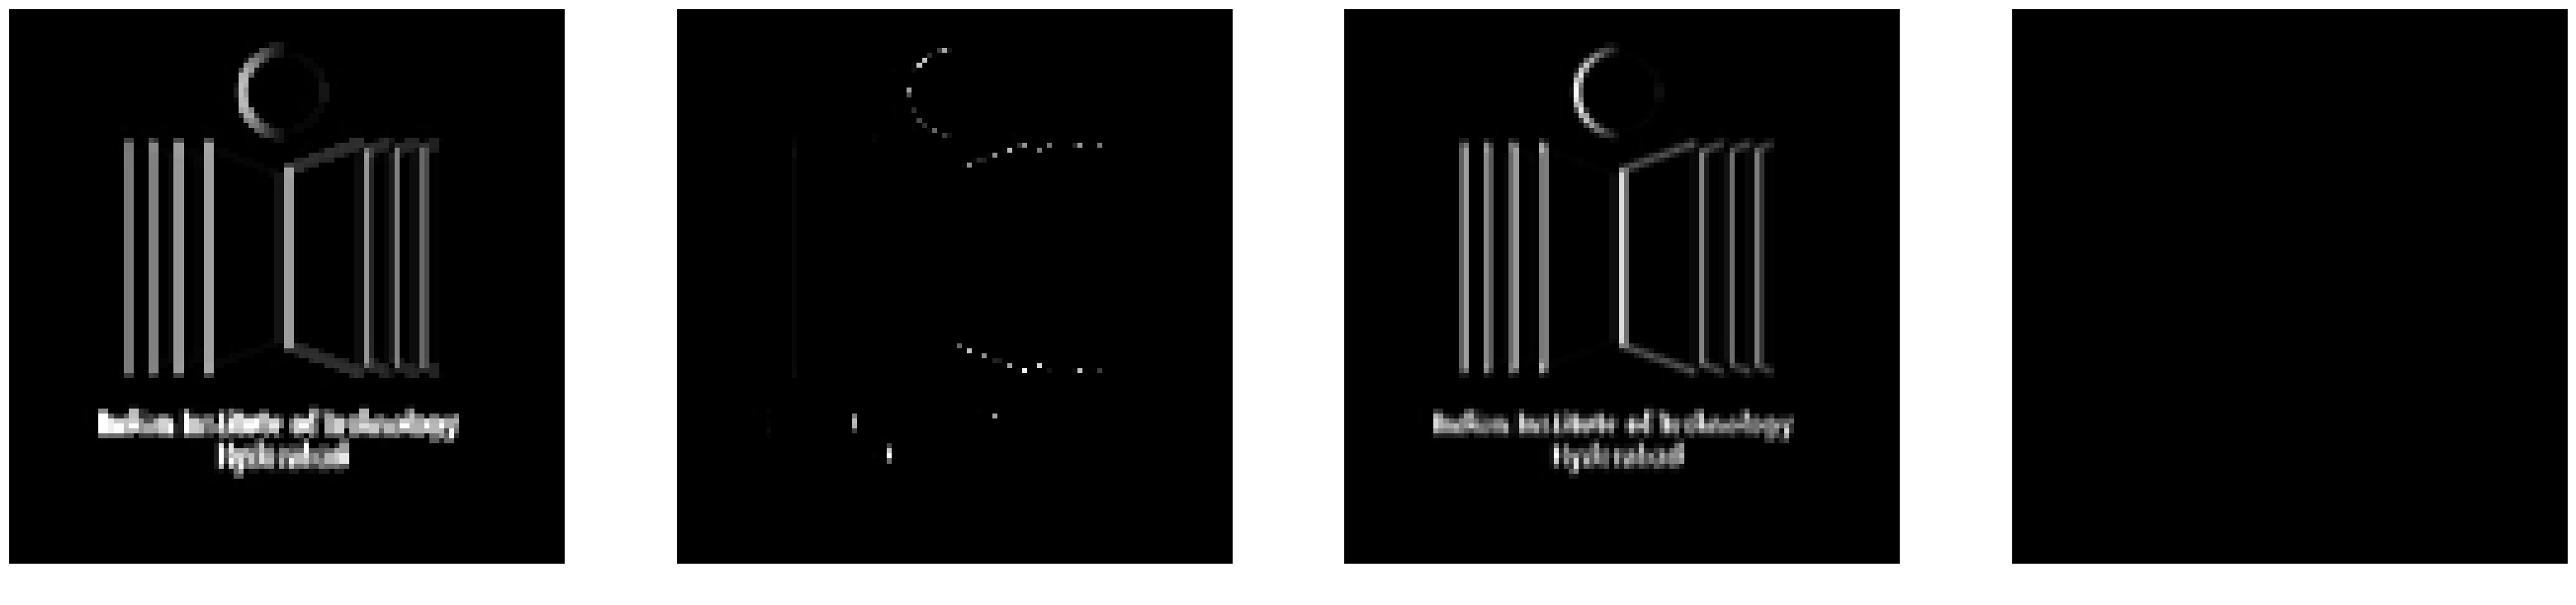

In [132]:
# Performing Pooling Operation

pool_fn = ['max', 'min', 'avg', 'GAP']
fig, axes = plt.subplots(1, 4, figsize=(40, 10))
for ax, pool_t in zip(axes, pool_fn):
    act = pooling(img=activation, pool_type=pool_t, stride=2, pool=[2, 2])
    ax.imshow(act, cmap='gray')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(pool_t + ' pool output')
    ax.xaxis.label.set_color('white')
    ax.xaxis.label.set_fontsize(25) 

3. Convolution Layer Function

In [133]:
# Convolution Layer Function

def conv2D(img: np.ndarray, n_filters: int, dim_filter: int, stride: int, pad_type: str, activation_fn: str, pad: int = 0, filter_required: bool = False) -> np.ndarray:
    # np.random.seed(33)
    c = img.shape[-1]
    activation_list = []
    filter_stack = []
    for _ in range(n_filters):
        filteR = np.random.rand(dim_filter, dim_filter, c)
        filter_stack.append(filteR)
        activation_list.append(convolution(img, filteR, stride, pad, pad_type, activation_fn))
    if not filter_required:
        return np.stack(activation_list, axis=-1)
    else:
        return (np.stack(activation_list, axis=-1), filter_stack)

In [134]:
# Performing the operation of a convolutional layer

activation_stack, filter_stack = conv2D(img=image, n_filters=6, dim_filter=3, pad_type='none', pad=0, stride=1, 
                                        activation_fn='relu', filter_required=True)
print(f"The image sige is {image.shape}")
print(f"The activation map after conv2D is : {activation_stack.shape}")

The image sige is (224, 224, 3)
The activation map after conv2D is : (222, 222, 6)


The input image is : 


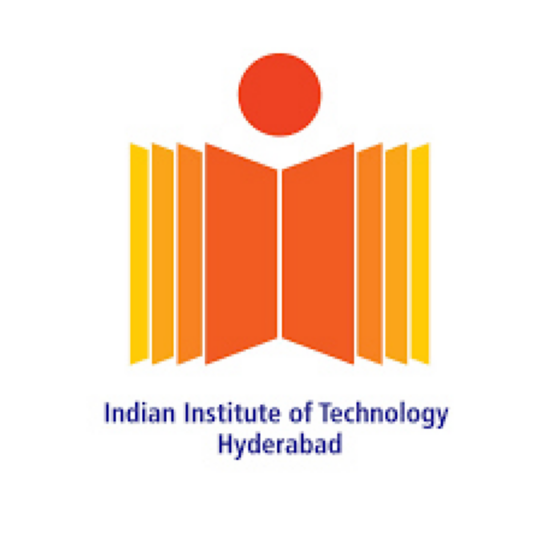

The filters and activation maps are : 


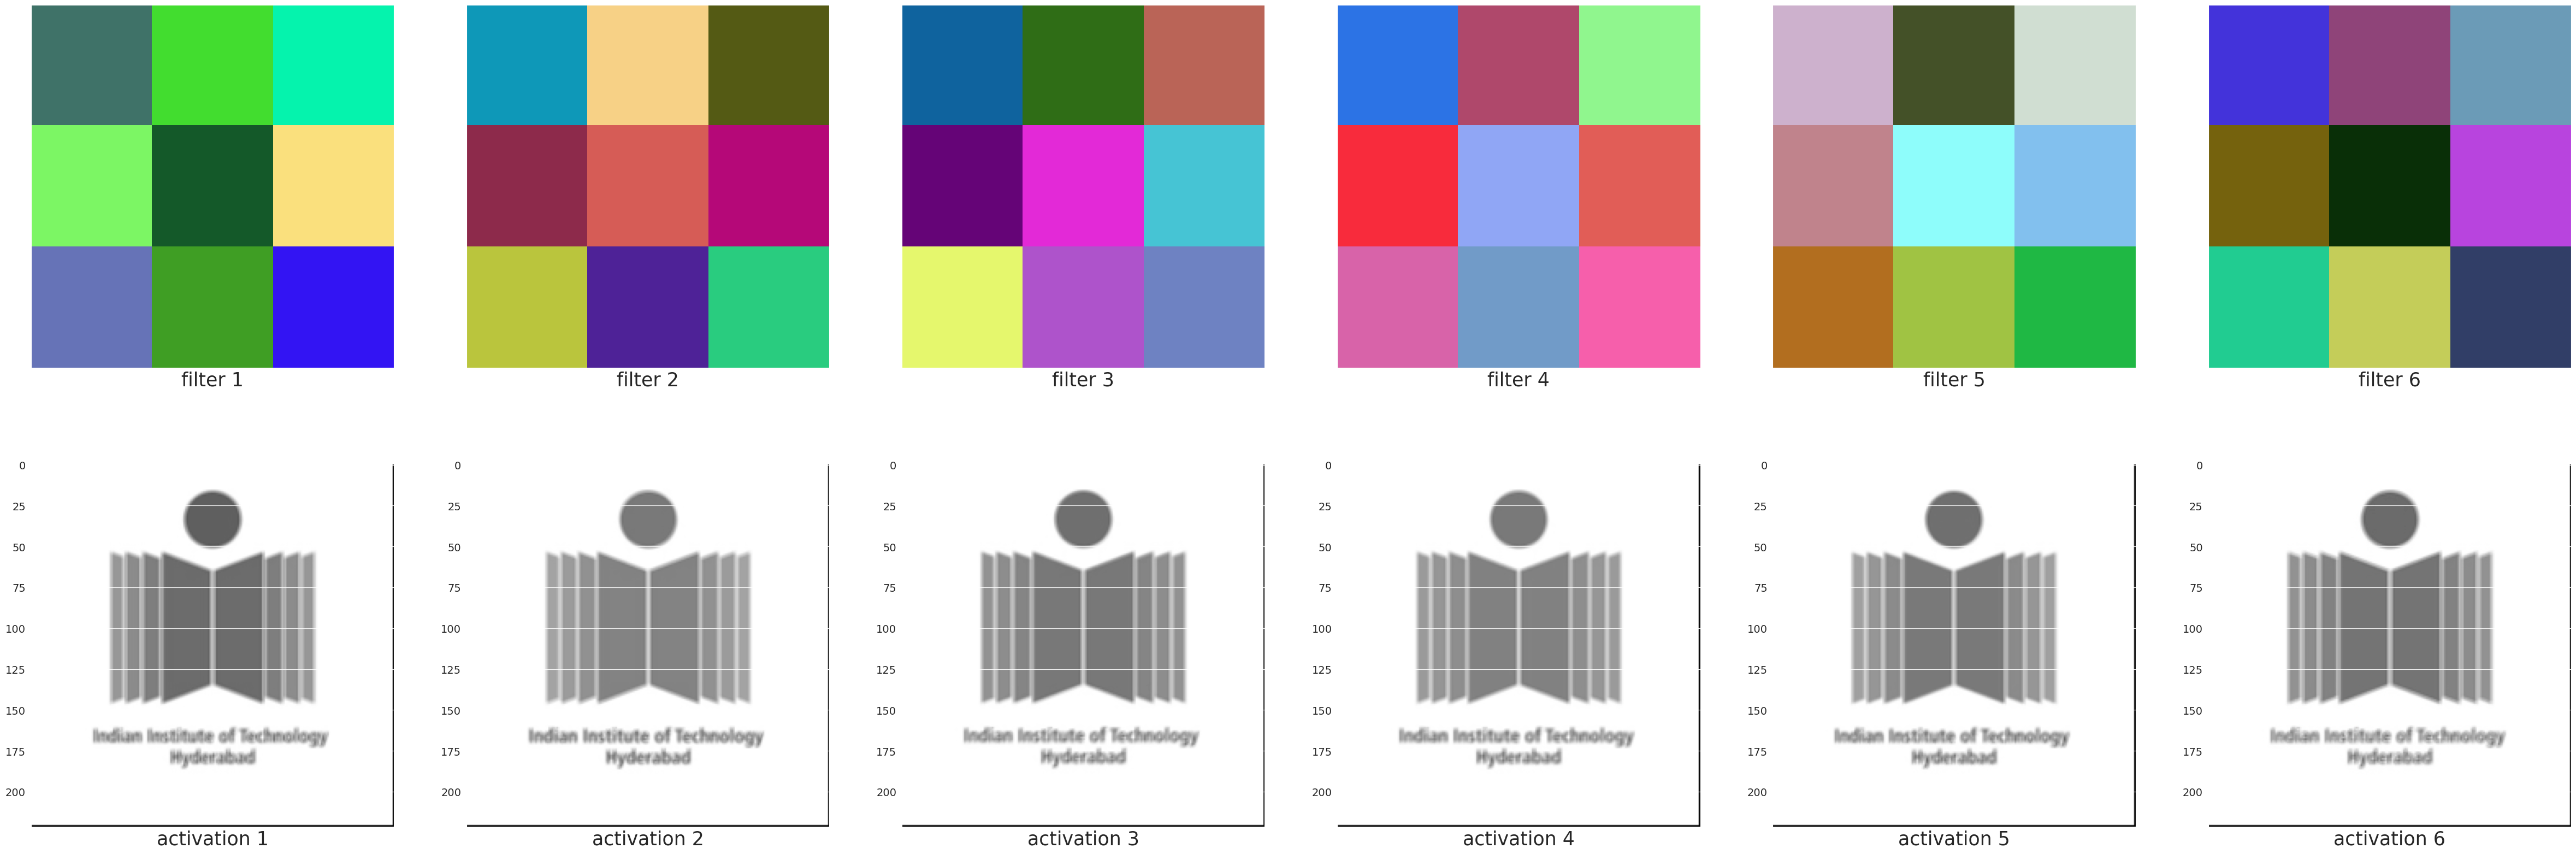

In [135]:
# Showing input filters and activation maps
plt.figure()
print("The input image is : ")
plt.xticks([]); plt.yticks([])
plt.imshow(image)
plt.show()

print("The filters and activation maps are : ")
fig, ax = plt.subplots(2, len(filter_stack), figsize=(len(filter_stack) * 10, 20))
for i, filter in enumerate(filter_stack):
    ax[0, i].imshow(filter)
    ax[0, i].set_xticks([]); ax[0, i].set_yticks([])
    ax[0, i].set_xlabel(f'filter {i+1}')
    # ax[0, i].xaxis.label.set_color('white')
    ax[0, i].xaxis.label.set_fontsize(25)

    ax[1, i].imshow(activation_stack[:, :, i], cmap='gray')
    ax[1, i].set_xticks([]); ax[0, i].set_yticks([])
    ax[1, i].set_xlabel(f'activation {i+1}')
    # ax[1, i].xaxis.label.set_color('white')
    ax[1, i].xaxis.label.set_fontsize(25)

4. Pooling Layer Function

In [136]:
# Pooling layer Function

def pool2D(img: np.ndarray, pool_type: str, stride: int = None, pool: "list[int]" = None):
    c = img.shape[-1]; pool_list = []
    for i in range(c):
        pool_list.append(pooling(img=img[:, :, i], pool_type=pool_type, stride=stride, pool=pool))
    return np.stack(pool_list, axis=-1)

In [137]:
# Performing the operation for a pooling layer

pool_activation_stack = pool2D(img=activation_stack, stride=2, pool_type='min', pool=[2, 2])
print(f"The activation map size before is {activation_stack.shape}")
print(f"The activation map after pool2D is : {pool_activation_stack.shape}")

The activation map size before is (222, 222, 6)
The activation map after pool2D is : (111, 111, 6)


5. Flattening Function

In [138]:
# Flattenting (unraveling) function

def flatten(input: np.ndarray, out_dim: int = None) -> np.ndarray:
    # np.random.seed(33)
    flat_in = input.reshape(-1, 1)
    if out_dim == None:
        return flat_in
    in_dim = flat_in.shape[0]
    weights, bias = np.random.rand(in_dim, out_dim), np.random.rand(out_dim, 1)
    output = weights.T @ flat_in + bias
    return output

In [139]:
# Performing flattening

act = flatten(input=pool_activation_stack, out_dim=254)
print(f"The activation map size before is {pool_activation_stack.shape}")
print(f"The activation map after flatten is : {act.shape}")

The activation map size before is (111, 111, 6)
The activation map after flatten is : (254, 1)


6. Multilayer Perceptron (MLP) function

In [140]:
# Softmax Function Implemented

def softmax(x: np.ndarray) -> np.ndarray:
    out = np.nan_to_num(np.exp(x))
    return out/np.sum(out)

In [141]:
# Multilayer Perceptron Function

def MLP(input: np.ndarray, hid_dim: "list[int]", activation_fn: str, do_softmax: bool = True) -> np.ndarray:
    # np.random.seed(33)
    # Default Values
    ACTIVATION_FN = {'relu': relu, 'sigmoid': sigmoid, 'tanh': tanh, 'prelu': prelu}

    # Parameter Checks
    if activation_fn not in ACTIVATION_FN.keys():
        raise ValueError("MLP: activation_fn must be one of %r ." % ACTIVATION_FN)
    
    n = len(input)
    layers = [n] + hid_dim

    # Initializing weights and biases as random
    weights = [np.random.rand(layers[i], layers[i+1]) for i in range(len(layers) - 1)]
    biases = [np.random.rand(layers[i+1], 1) for i in range(len(layers) - 1)]

    # Doing a forward pass for MLP
    out = input
    for i in range(len(weights) - 1):
        out = weights[i].T @ out + biases[i]
        out = ACTIVATION_FN[activation_fn](out)
        
    out = weights[-1].T @ out + biases[-1]

    if do_softmax:
        return softmax(out)
    return out

In [142]:
# Performing MLP

act2 = MLP(input=act, hid_dim=[128, 56, 24, 10], activation_fn='sigmoid', do_softmax=True)
print(f"The activation map size before is {act.shape}")
print(f"The activation map after MLP is : {act2.shape}")

The activation map size before is (254, 1)
The activation map after MLP is : (10, 1)


7. Feed-forward path

In [ ]:
# Downloading CIFAR-10 Dataset
!curl https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz --output cifar-10-python.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0   771k      0  0:03:35  0:03:35 --:--:--  437k      0  0:02:50  0:01:07  0:01:43  484k5  0:01:12  0:01:43  513k:01:23  0:01:49  467k515k3:12  0:02:26  0:00:46  560k0:03:24  0:03:00  0:00:24  889k  803k      0  0:03:27  0:03:15  0:00:12  556k


In [143]:
# Extracting CIFAR-10 Dataset

import tarfile
file = tarfile.open('cifar-10-python.tar.gz')
file.extractall('./cifar')
file.close()

def unpickle(file: str) -> dict:
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [144]:
def CNN(img: np.ndarray, do_softmax: bool = True, bottleneck_out: bool = False, activation_fn: str = 'sigmoid') -> np.ndarray:
    
    out1 = conv2D(img=img, n_filters=16, dim_filter=3, pad_type='zero', stride=1, activation_fn=activation_fn, pad=1)
    out2 = pool2D(img=out1, stride=2, pool_type='max', pool=[2, 2])
    out3 = conv2D(img=out2, n_filters=8, dim_filter=3, stride=1, pad_type='none', activation_fn=activation_fn)
    out4 = pool2D(img=out3, stride=2, pool_type='max', pool=[2, 2])
    out5 = pool2D(img=out4, pool_type='GAP')
    out5 = out5.reshape(-1, 1)
    out5 = flatten(out5, 8)
    if bottleneck_out:
        return out5
    out6 = MLP(input=out5, hid_dim=[100, 10], activation_fn=activation_fn, do_softmax=do_softmax)
    return out6

The image is :


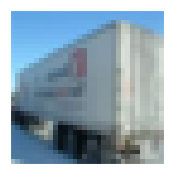

In [145]:
# Applying the forward pass

data_dict = unpickle('cifar/cifar-10-batches-py/data_batch_1')
test_img = np.rot90(data_dict[b'data'][15, :].reshape((32, 32, 3), order = 'F'), k=3)
print("The image is :")
plt.figure(figsize=(2, 2))
plt.xticks([]); plt.yticks([])
plt.imshow(test_img)
plt.show()

In [146]:
out_with_softmax = CNN(img=test_img, do_softmax=True)
out_without_softmax = CNN(img=test_img, do_softmax=False)
print(f"The imput shape is {test_img.shape}")
print(f"The output shape is {out_with_softmax.shape}")

The imput shape is (32, 32, 3)
The output shape is (10, 1)


In [147]:
print("The output with softmax is  :")
print(out_with_softmax.reshape(-1, ))
print()
print("The output without softmax is  :")
print(out_without_softmax.reshape(-1, ))

The output with softmax is  :
[0.13208351 0.0123738  0.28529232 0.39653028 0.06002544 0.04375478
 0.00202529 0.06286248 0.00273077 0.00232132]

The output without softmax is  :
[45.90510193 57.00268693 49.13521022 50.32014333 52.40911048 47.51205546
 51.18462018 51.54424657 47.65703191 52.28450584]


8. (a)  Choose an image from each of the 10 classes and display the output vector for each case. Do
you see any trend in the output vectors?

In [148]:
# Get one image of each class

u_labels = list(set(data_dict[b'labels']))
all_class_data_idx = [data_dict[b'labels'].index(label) for label in u_labels]
u_class_img = [np.rot90(data_dict[b'data'][idx, :].reshape((32, 32, 3), order = 'F'), k = 3) for idx in all_class_data_idx]

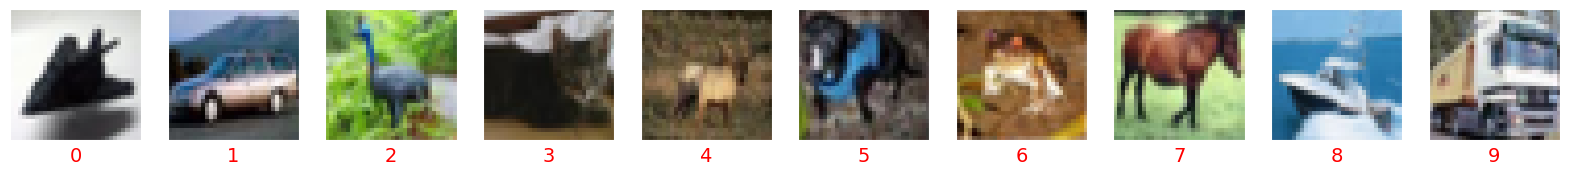

In [149]:
# Showing images of each class
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(u_class_img[i])
    ax[i].set_xticks([]); ax[i].set_yticks([])
    ax[i].set_xlabel(i)
    ax[i].xaxis.label.set_color('red')   

In [150]:
out_each_img = [CNN(img=img, do_softmax=True) for img in u_class_img]
for i in range(10):
    print(f"For {i} image {out_each_img[i].reshape(-1, )}")
    print()

For 0 image [1.14451201e-02 3.27901053e-02 3.15196205e-03 2.54802865e-02
 1.72957403e-04 1.52481056e-02 4.52458187e-02 5.72697053e-01
 2.26184295e-01 6.75842962e-02]

For 1 image [1.27451861e-02 9.64406044e-04 2.25455652e-01 7.78061575e-05
 3.00512802e-03 1.93267058e-01 2.94078225e-01 1.07651422e-03
 2.58773240e-01 1.05567838e-02]

For 2 image [2.03962770e-02 1.05304161e-01 4.24707335e-01 1.86881652e-02
 7.04556172e-04 5.36536787e-03 1.35038650e-03 4.23273529e-01
 2.05041078e-04 5.18176372e-06]

For 3 image [1.03237622e-02 5.45107241e-02 1.63087787e-02 8.94020723e-04
 8.05592926e-01 4.91830165e-02 4.65168229e-02 3.64743124e-04
 1.61551403e-02 1.50065640e-04]

For 4 image [1.50230522e-03 3.58722091e-02 8.86989429e-03 8.48343537e-01
 3.36123122e-03 6.08594985e-02 2.40752877e-02 8.29919360e-03
 8.80431052e-03 1.25332200e-05]

For 5 image [1.79378985e-01 2.13039001e-03 1.22538719e-02 4.22458265e-02
 1.05599398e-03 7.02643481e-01 8.07093533e-04 8.91900266e-04
 5.83049325e-02 2.87524617e-04]

8. (b) Does a randomly initialized network show any discriminability? Visualize (plot) the bottleneck layer (output of flattening layer) using PCA (builtin function) in 2D. Choose three images per class from CIFAR-10.

In [151]:
# Getting indexes of the labels
labels = np.array(data_dict[b'labels'])
cls_idx = [np.where(labels == l)[0][:3] for l in u_labels]

In [152]:
# Getting images for those indexes
imgs = []
for i in u_labels:
    cls_imgs = []
    for j in range(3):
        cls_imgs.append(np.rot90(data_dict[b'data'][cls_idx[i][j], :].reshape((32, 32, 3), order = 'F'), k = 3))
    imgs.append(cls_imgs)

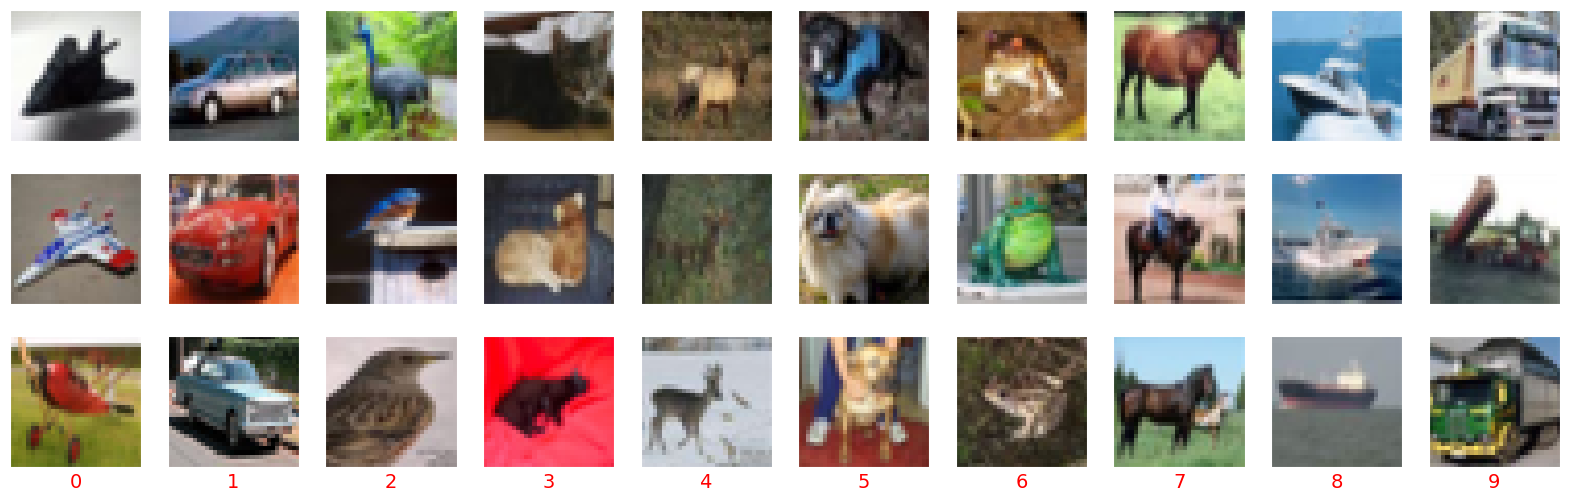

In [153]:
# Plotting all the images
fig, ax = plt.subplots(3, 10, figsize=(20, 6))
for i in range(10):
    for j in range(3):
        ax[j, i].imshow(imgs[i][j])
        ax[j, i].set_xticks([]); ax[j, i].set_yticks([])
    ax[j, i].set_xlabel(i)
    ax[j, i].xaxis.label.set_color('red') 

In [154]:
# Extracting bottleneck features for all the images
features = []
for i in u_labels:
    cls_features = []
    for j in range(3):
        cls_features.append(CNN(img=imgs[i][j], do_softmax=True, bottleneck_out=True))
    features.append(np.array(cls_features).reshape(3, 8))

features_tog = np.vstack(features)

In [155]:
# Reducing dimansion for all the images
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_tog)

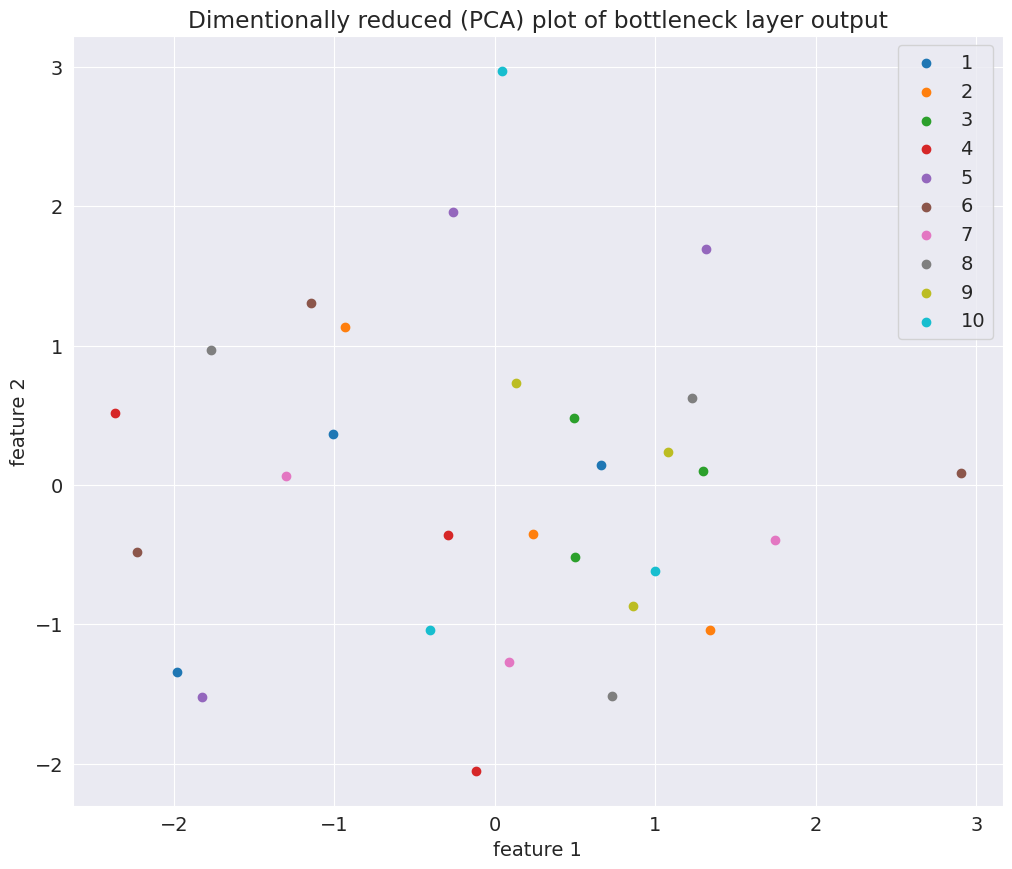

In [156]:
# Plotting the graph with reduced dimension features
plt.figure(figsize=(12, 10))
for i in range(10):
    plt.scatter(pca_features[3*i: 3*(i+1), 0], pca_features[3*i: 3*(i+1), 1], label = i+1)
plt.legend()
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Dimentionally reduced (PCA) plot of bottleneck layer output")
plt.show()